<a href="https://colab.research.google.com/github/valquero779/Inteligencia-Artifcial/blob/main/NN_Cancer_De_Mama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [218]:
#pip install numpy --upgrade --ignore-installed

In [219]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from scipy import stats
import numpy as np
import pandas as pd

#X, y = make_classification(n_samples=200)


datosDeCancer = pd.read_csv('cancer_mama.csv')
print(datosDeCancer)





       842302  M  17.99  10.38   122.8    1001   0.1184   0.2776   0.3001  \
0      842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690   
1    84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740   
2    84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140   
3    84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800   
4      843786  M  12.45  15.70   82.57   477.1  0.12780  0.17000  0.15780   
..        ... ..    ...    ...     ...     ...      ...      ...      ...   
563    926424  M  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390   
564    926682  M  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400   
565    926954  M  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251   
566    927241  M  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140   
567     92751  B   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000   

      0.1471  ...   25.38  17.33   184.6    2019   0.1622   0.6656  0.7119 

In [220]:
del datosDeCancer["842302"]
print(datosDeCancer)

     M  17.99  10.38   122.8    1001   0.1184   0.2776   0.3001   0.1471  \
0    M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690  0.07017   
1    M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740  0.12790   
2    M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140  0.10520   
3    M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800  0.10430   
4    M  12.45  15.70   82.57   477.1  0.12780  0.17000  0.15780  0.08089   
..  ..    ...    ...     ...     ...      ...      ...      ...      ...   
563  M  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390  0.13890   
564  M  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400  0.09791   
565  M  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251  0.05302   
566  M  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140  0.15200   
567  B   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000  0.00000   

     0.2419  ...   25.38  17.33   184.6    2019   0.1622   0.6656  0.7119  \
0    0.181

In [221]:
datosDeCancerRename = datosDeCancer.rename({
'M': 'Conclusion'
, '17.99': 'A'
, '10.38': 'B'
, '122.8': 'C'
, '1001': 'D'
, '0.1184': 'E'
, '0.2776': 'F'
, '0.3001': 'G'
, '0.1471': 'H'
, '0.2419': 'I'
, '25.38': 'J'
, '17.33': 'K'
, '184.6': 'M'
, '2019': 'N'
, '0.1622': 'Ñ'
, '0.6656': 'O'
, '0.7119': 'P'
, '0.2654': 'Q'
, '0.4601': 'R'
, '0.1189': 'S'
}, axis=1)

print(datosDeCancerRename)

    Conclusion      A      B       C       D        E        F        G  \
0            M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690   
1            M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740   
2            M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140   
3            M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800   
4            M  12.45  15.70   82.57   477.1  0.12780  0.17000  0.15780   
..         ...    ...    ...     ...     ...      ...      ...      ...   
563          M  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390   
564          M  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400   
565          M  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251   
566          M  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140   
567          B   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000   

           H       I  ...       J      K       M       N        Ñ        O  \
0    0.07017  0.1812 

In [222]:
datosDeCancerRename=datosDeCancerRename.reindex(columns=["A","B","C","D","E","F","G","H","I","J","K","M","N","Ñ","O","P","Q","R","S","Conclusion"])
print(datosDeCancerRename)

         A      B       C       D        E        F        G        H       I  \
0    20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690  0.07017  0.1812   
1    19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740  0.12790  0.2069   
2    11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140  0.10520  0.2597   
3    20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800  0.10430  0.1809   
4    12.45  15.70   82.57   477.1  0.12780  0.17000  0.15780  0.08089  0.2087   
..     ...    ...     ...     ...      ...      ...      ...      ...     ...   
563  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390  0.13890  0.1726   
564  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400  0.09791  0.1752   
565  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251  0.05302  0.1590   
566  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140  0.15200  0.2397   
567   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000  0.00000  0.1587   

          J      K       M 

In [223]:
datosDeCancerRename['Conclusion'] = datosDeCancerRename['Conclusion'].replace(['M', 'B'], [1, 0])
print(datosDeCancerRename)

         A      B       C       D        E        F        G        H       I  \
0    20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690  0.07017  0.1812   
1    19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740  0.12790  0.2069   
2    11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140  0.10520  0.2597   
3    20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800  0.10430  0.1809   
4    12.45  15.70   82.57   477.1  0.12780  0.17000  0.15780  0.08089  0.2087   
..     ...    ...     ...     ...      ...      ...      ...      ...     ...   
563  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390  0.13890  0.1726   
564  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400  0.09791  0.1752   
565  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251  0.05302  0.1590   
566  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140  0.15200  0.2397   
567   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000  0.00000  0.1587   

          J      K       M 

         A      B       C       D        E        F        G        H       I  \
0    20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690  0.07017  0.1812   
1    19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740  0.12790  0.2069   
2    11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140  0.10520  0.2597   
3    20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800  0.10430  0.1809   
4    12.45  15.70   82.57   477.1  0.12780  0.17000  0.15780  0.08089  0.2087   
..     ...    ...     ...     ...      ...      ...      ...      ...     ...   
563  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390  0.13890  0.1726   
564  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400  0.09791  0.1752   
565  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251  0.05302  0.1590   
566  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140  0.15200  0.2397   
567   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000  0.00000  0.1587   

          J      K       M 

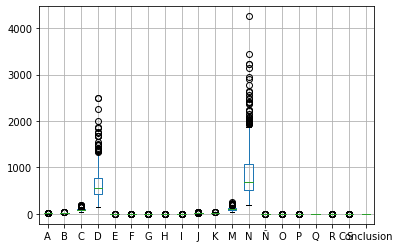

In [224]:
datosDeCancerRename.boxplot(column=["A","B","C","D","E","F","G","H","I","J","K","M","N","Ñ","O","P","Q","R","S","Conclusion"])

datosDeCancerCopia=datosDeCancerRename
print(datosDeCancerCopia)

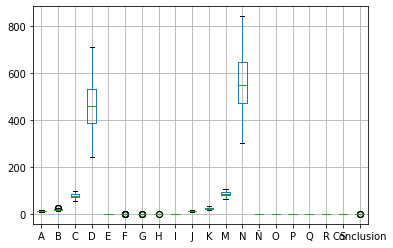

In [225]:

Recorrido= ["A","B","C","D","E","F","G","H","I","J","K","M","N","Ñ","O","P","Q","R","S"]

for i in Recorrido:
  #print(datosDeCancerCopia)
  #print(i)
  q1 = np.percentile(datosDeCancerCopia[i], 30,
               interpolation  = 'midpoint')
  q3 = np.percentile(datosDeCancerCopia[i], 70,
               interpolation  = 'midpoint')
  iqr=q3-q1

  #upper = np.where(datosDeCancerCopia[i] >= (q3 + 1.5 * iqr))

  #lower = np.where(datosDeCancerCopia[i] <= (q1 - 1.5 * iqr))
  #fence_low  = q1-3*iqr
  #fence_high = q3+3*iqr
  #datosDeCancerCopia = datosDeCancerCopia.loc[(datosDeCancerCopia[i] > fence_low) & (datosDeCancerCopia[i] < fence_high)]

  upper = np.where(datosDeCancerCopia[i] >= (q3 + (1.5 * iqr)))

  lower = np.where(datosDeCancerCopia[i] <= (q1 - (1.5 * iqr)))
  #print(upper)
  #print(lower)
  
  for j in upper[0]:
    #print(j)
    datosDeCancerCopia.drop(j, inplace = True)
  
  for j in lower[0]:
    datosDeCancerCopia.drop(j, inplace = True)
  datosDeCancerCopia.reset_index(drop=True, inplace=True)
  

datosDeCancerCopia.boxplot(column=["A","B","C","D","E","F","G","H","I","J","K","M","N","Ñ","O","P","Q","R","S","Conclusion"])

In [226]:
matrizDeCorrelacion=datosDeCancerCopia.corr()
print(matrizDeCorrelacion)

                   A         B         C         D         E         F  \
A           1.000000 -0.005609  0.997506  0.997047 -0.314701 -0.034383   
B          -0.005609  1.000000 -0.000175  0.000193 -0.017037  0.093542   
C           0.997506 -0.000175  1.000000  0.993164 -0.275663  0.032256   
D           0.997047  0.000193  0.993164  1.000000 -0.339378 -0.060225   
E          -0.314701 -0.017037 -0.275663 -0.339378  1.000000  0.658501   
F          -0.034383  0.093542  0.032256 -0.060225  0.658501  1.000000   
G           0.057518  0.083959  0.112482  0.045085  0.310586  0.728406   
H           0.256044 -0.035453  0.300117  0.237475  0.490234  0.648420   
I          -0.207418  0.121012 -0.182203 -0.219930  0.348351  0.368588   
J           0.958169  0.034774  0.956526  0.957961 -0.305992 -0.021662   
K          -0.018089  0.874765 -0.013672 -0.013054  0.004822  0.072893   
M           0.951494  0.034100  0.957123  0.949612 -0.281194  0.064203   
N           0.955249  0.038585  0.9523

In [227]:
x=datosDeCancerCopia[[ "A","B","C","D","E","F","G","H","I","J","K","M","N","Ñ","O","P","Q","R","S"]]
y=datosDeCancerCopia[[ "Conclusion"]]

In [228]:


X_train, X_test, y_train, y_test = train_test_split(x, y,train_size=0.6)
print(len(X_train))
clf = MLPClassifier(max_iter=200).fit(X_train, y_train)
clf.score(X_test, y_test) ## ENTRE MÁS ALTO, MEJOR

125


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9761904761904762